In [6]:
#coding=utf-8
%matplotlib inline

In [24]:
from sklearn import preprocessing
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pylab as plt


data= pd.read_csv('D:\\data\\uidfeature2.csv',sep=',')
df=DataFrame(data)

#drop the nan value samples
newdf=df.dropna(how='any')
#get the data and label
label=np.array(newdf.ix[:,1])
datas=np.array(newdf.ix[:,2:])
print 'data shape:',datas.shape
#product the new data distribution like Gaussian with zero mean and unit variance.
datasnew=preprocessing.robust_scale(datas)# ignore some very large data



data shape: (10058L, 96L)


In [83]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
modeltree=ExtraTreesClassifier()
modeltree.fit(datasnew,label)

importance=modeltree.feature_importances_
#print 'importance of features:','\n',importance
print  'index of features sort by importance:','\n',np.argsort(model.feature_importances_)
print '#'*80
print 'select module'
modeltreenew=SelectFromModel(lsvc,prefit=True)
print modeltreenew.transform(datasnew).shape[1]
print modeltreenew.transform(datasnew)

index of features sort by importance: 
[95 40 36 19 18 35  9 39 12 20 71 93  7  0 94 21  8 17  2 76 54 69 41 61 10
 14 68 70 63 22  1 78 33 84 52 86 13 32 89 38 49 67 79 48 80 43 60 53 59 87
 81 11  6 65 82 29 23 46 83 42 30 25 34 45 37 50 24 91 15  4 31 44 57 58 62
  5 26 56 88 28 66 85 51 90 55 73  3 77 64 75 74 47 72 27 16 92]
################################################################################
select module
67
[[ 0.          0.5         0.         ..., -0.08035723 -0.15433353  0.        ]
 [ 0.          0.          0.         ..., -0.21380666  0.11421865  0.        ]
 [ 0.          0.5         0.         ...,  1.08580494  6.49332532  0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.59635637  1.11109839  0.        ]
 [ 0.          0.          0.         ..., -0.39061883 -0.09719558  0.        ]
 [ 0.         -0.5         0.         ..., -0.30054419 -0.37132034  0.        ]]


In [84]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
print 'feature num:','\n',datasnew.shape[1]
lsvc=LinearSVC(penalty='l1',dual=False,C=0.1)
lsvc.fit(datasnew,label)
#importance=lsvc.coef_
print 'index of features sort by importance:','\n',np.argsort(lsvc.coef_)

print '#'*80
print 'select module'
modellsvc=SelectFromModel(lsvc,prefit=True)
#通过一定的规则把小于阈值的特征清除掉后
print 'new feature num:','\n',modellsvc.transform(datasnew).shape[1]
print modellsvc.transform(datasnew)

feature num: 
96


index of features sort by importance: 
[[80  1 59 52 26 61  4 33  3 11 89 45 69 67  0 78 86 70 77 10 27 24 94 82
  92 42 22 57 84 20 21 90 65 72 56 55 53 93 51 50 48 76 87 63 95 19 28 18
  15 14 32 35 12 34  9  7 40  5 36 71 44 91 66 23 46 85 64 29 43 79 62 37
  88 60 54 16 73 68  8 38 83  6 13 31  2 47 17 75 25 81 74 49 30 58 41 39]]
################################################################################
select module
new feature num: 
67
[[ 0.          0.5         0.         ..., -0.08035723 -0.15433353  0.        ]
 [ 0.          0.          0.         ..., -0.21380666  0.11421865  0.        ]
 [ 0.          0.5         0.         ...,  1.08580494  6.49332532  0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.59635637  1.11109839  0.        ]
 [ 0.          0.          0.         ..., -0.39061883 -0.09719558  0.        ]
 [ 0.         -0.5         0.         ..., -0.30054419 -0.37132034  0.        ]]


In [88]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print datas.shape[1]
#X变量的数据必须是非负数
#newdatasnew= SelectKBest(chi2,k=30).fit_transform(datas,label)
#print newdatasnew.shape[1]

96


4


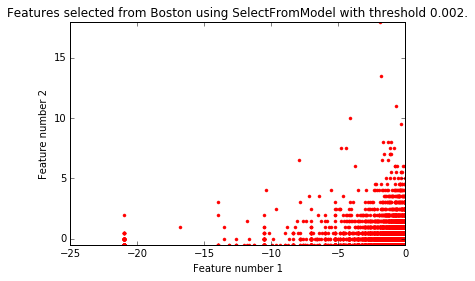

In [97]:

from sklearn.linear_model import LassoCV

X, y = datasnew,label

# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
clf = LassoCV()

# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold=0.001)
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]
print n_features
# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
while n_features > 2:
    sfm.threshold += 0.001
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]

# Plot the selected two features from X.
plt.title(
    "Features selected from Boston using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1] 
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2)-0.01, np.max(feature2)+0.01])
plt.show()

Feature ranking:
1. feature 92 (0.034115)
2. feature 27 (0.022288)
3. feature 74 (0.020345)
4. feature 75 (0.018459)
5. feature 23 (0.017342)
6. feature 29 (0.016909)
7. feature 73 (0.016724)
8. feature 16 (0.016693)
9. feature 3 (0.016015)
10. feature 11 (0.015676)
11. feature 86 (0.015518)
12. feature 4 (0.015096)
13. feature 25 (0.014896)
14. feature 89 (0.014833)
15. feature 33 (0.014484)
16. feature 45 (0.014367)
17. feature 42 (0.014109)
18. feature 64 (0.013877)
19. feature 80 (0.013785)
20. feature 43 (0.013755)
21. feature 83 (0.013664)
22. feature 90 (0.013437)
23. feature 57 (0.013364)
24. feature 66 (0.013283)
25. feature 91 (0.013028)
26. feature 62 (0.012974)
27. feature 32 (0.012949)
28. feature 58 (0.012829)
29. feature 84 (0.012660)
30. feature 15 (0.012593)
31. feature 48 (0.012587)
32. feature 88 (0.012327)
33. feature 59 (0.012236)
34. feature 77 (0.012030)
35. feature 46 (0.011823)
36. feature 47 (0.011764)
37. feature 50 (0.011747)
38. feature 1 (0.011589)
39. fea

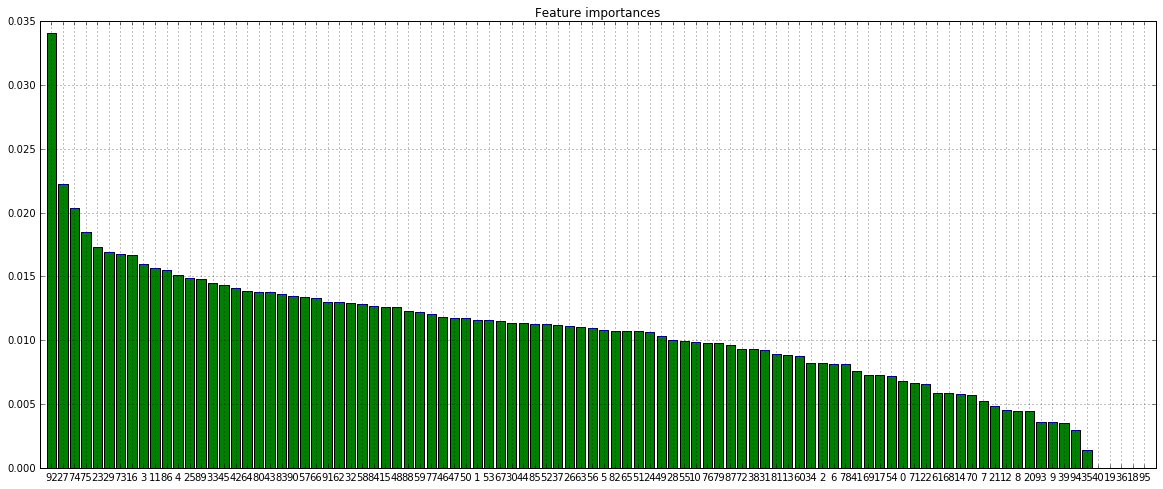

In [98]:
std = np.std([importance for tree in modeltree.estimators_],axis=0)
indices = np.argsort(importance)[::-1] #对特征按照重要性排序

# Print the feature ranking
print("Feature ranking:")

for f in range(datasnew.shape[1]):
    if importance[indices[f]]>0.01:
        print("%d. feature %d (%f)" % (f + 1, indices[f], importance[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20,8))
plt.title("Feature importances")
plt.bar(range(datasnew.shape[1]), importance[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(datasnew.shape[1]), indices)
plt.xlim([-1, datasnew.shape[1]])
plt.grid(True)
plt.show()